<a href="https://colab.research.google.com/github/simionattovini/thermal-machines/blob/main/Test%20Solutions/P1_MT_2s2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas Térmicas - P1 - 2s2024

## Enunciado

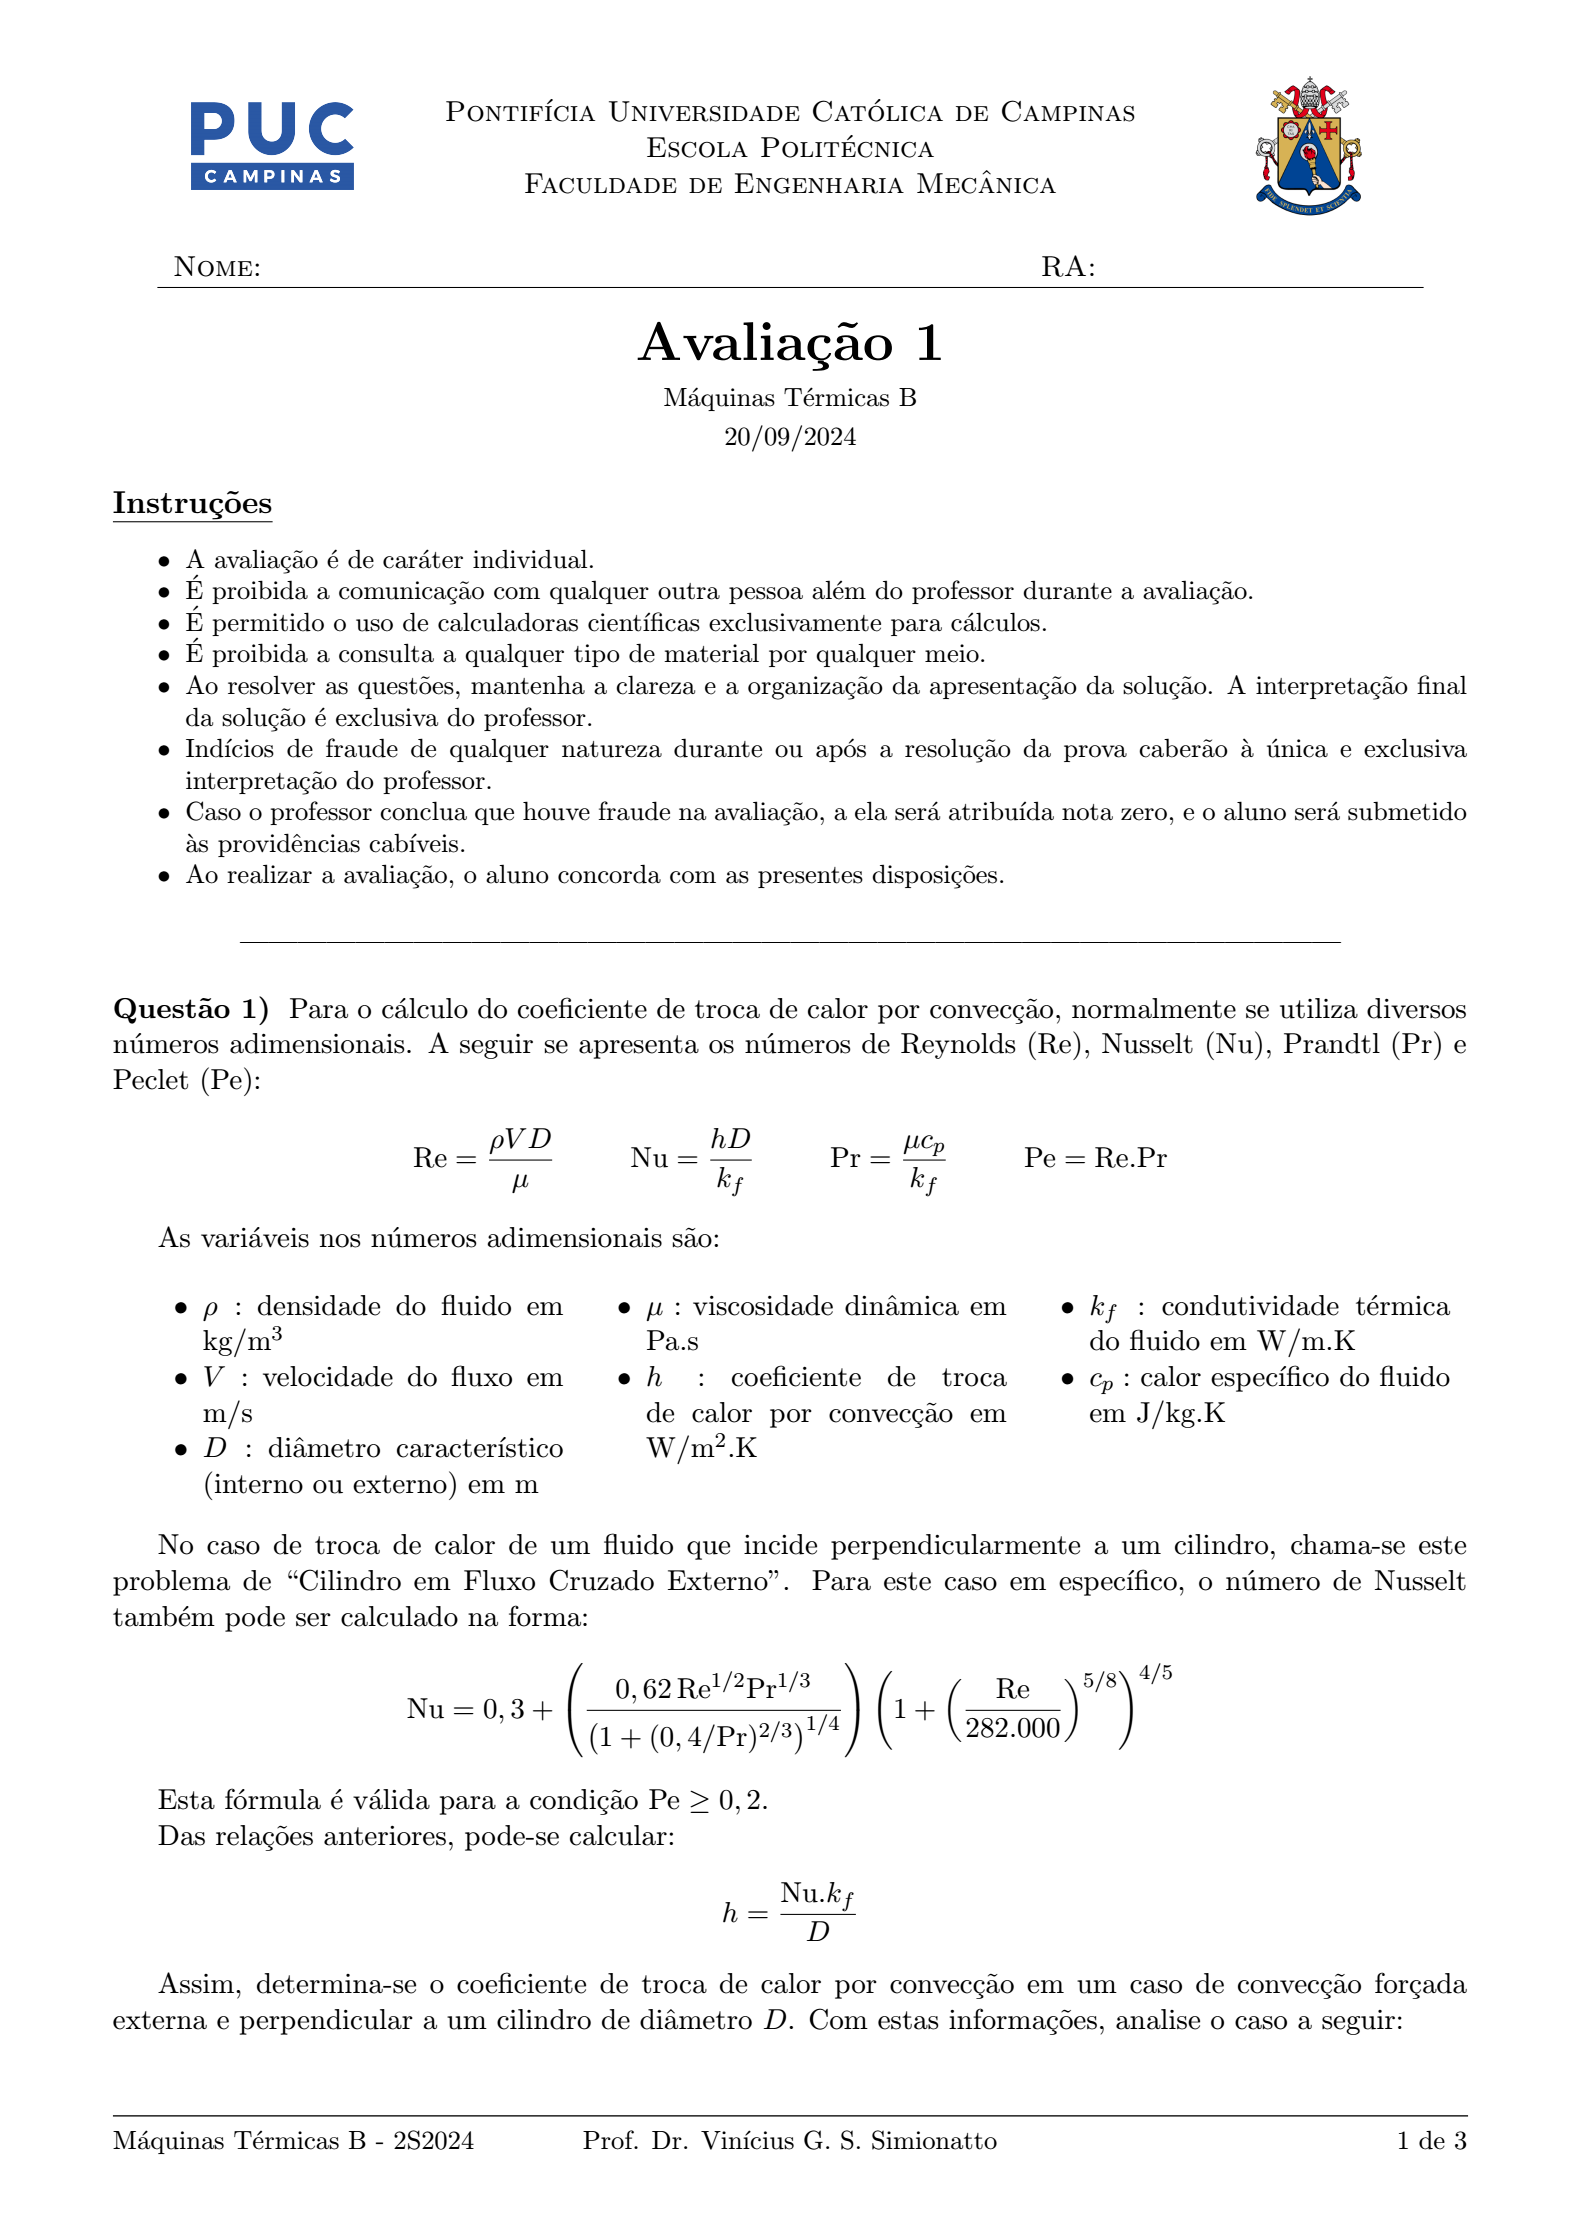

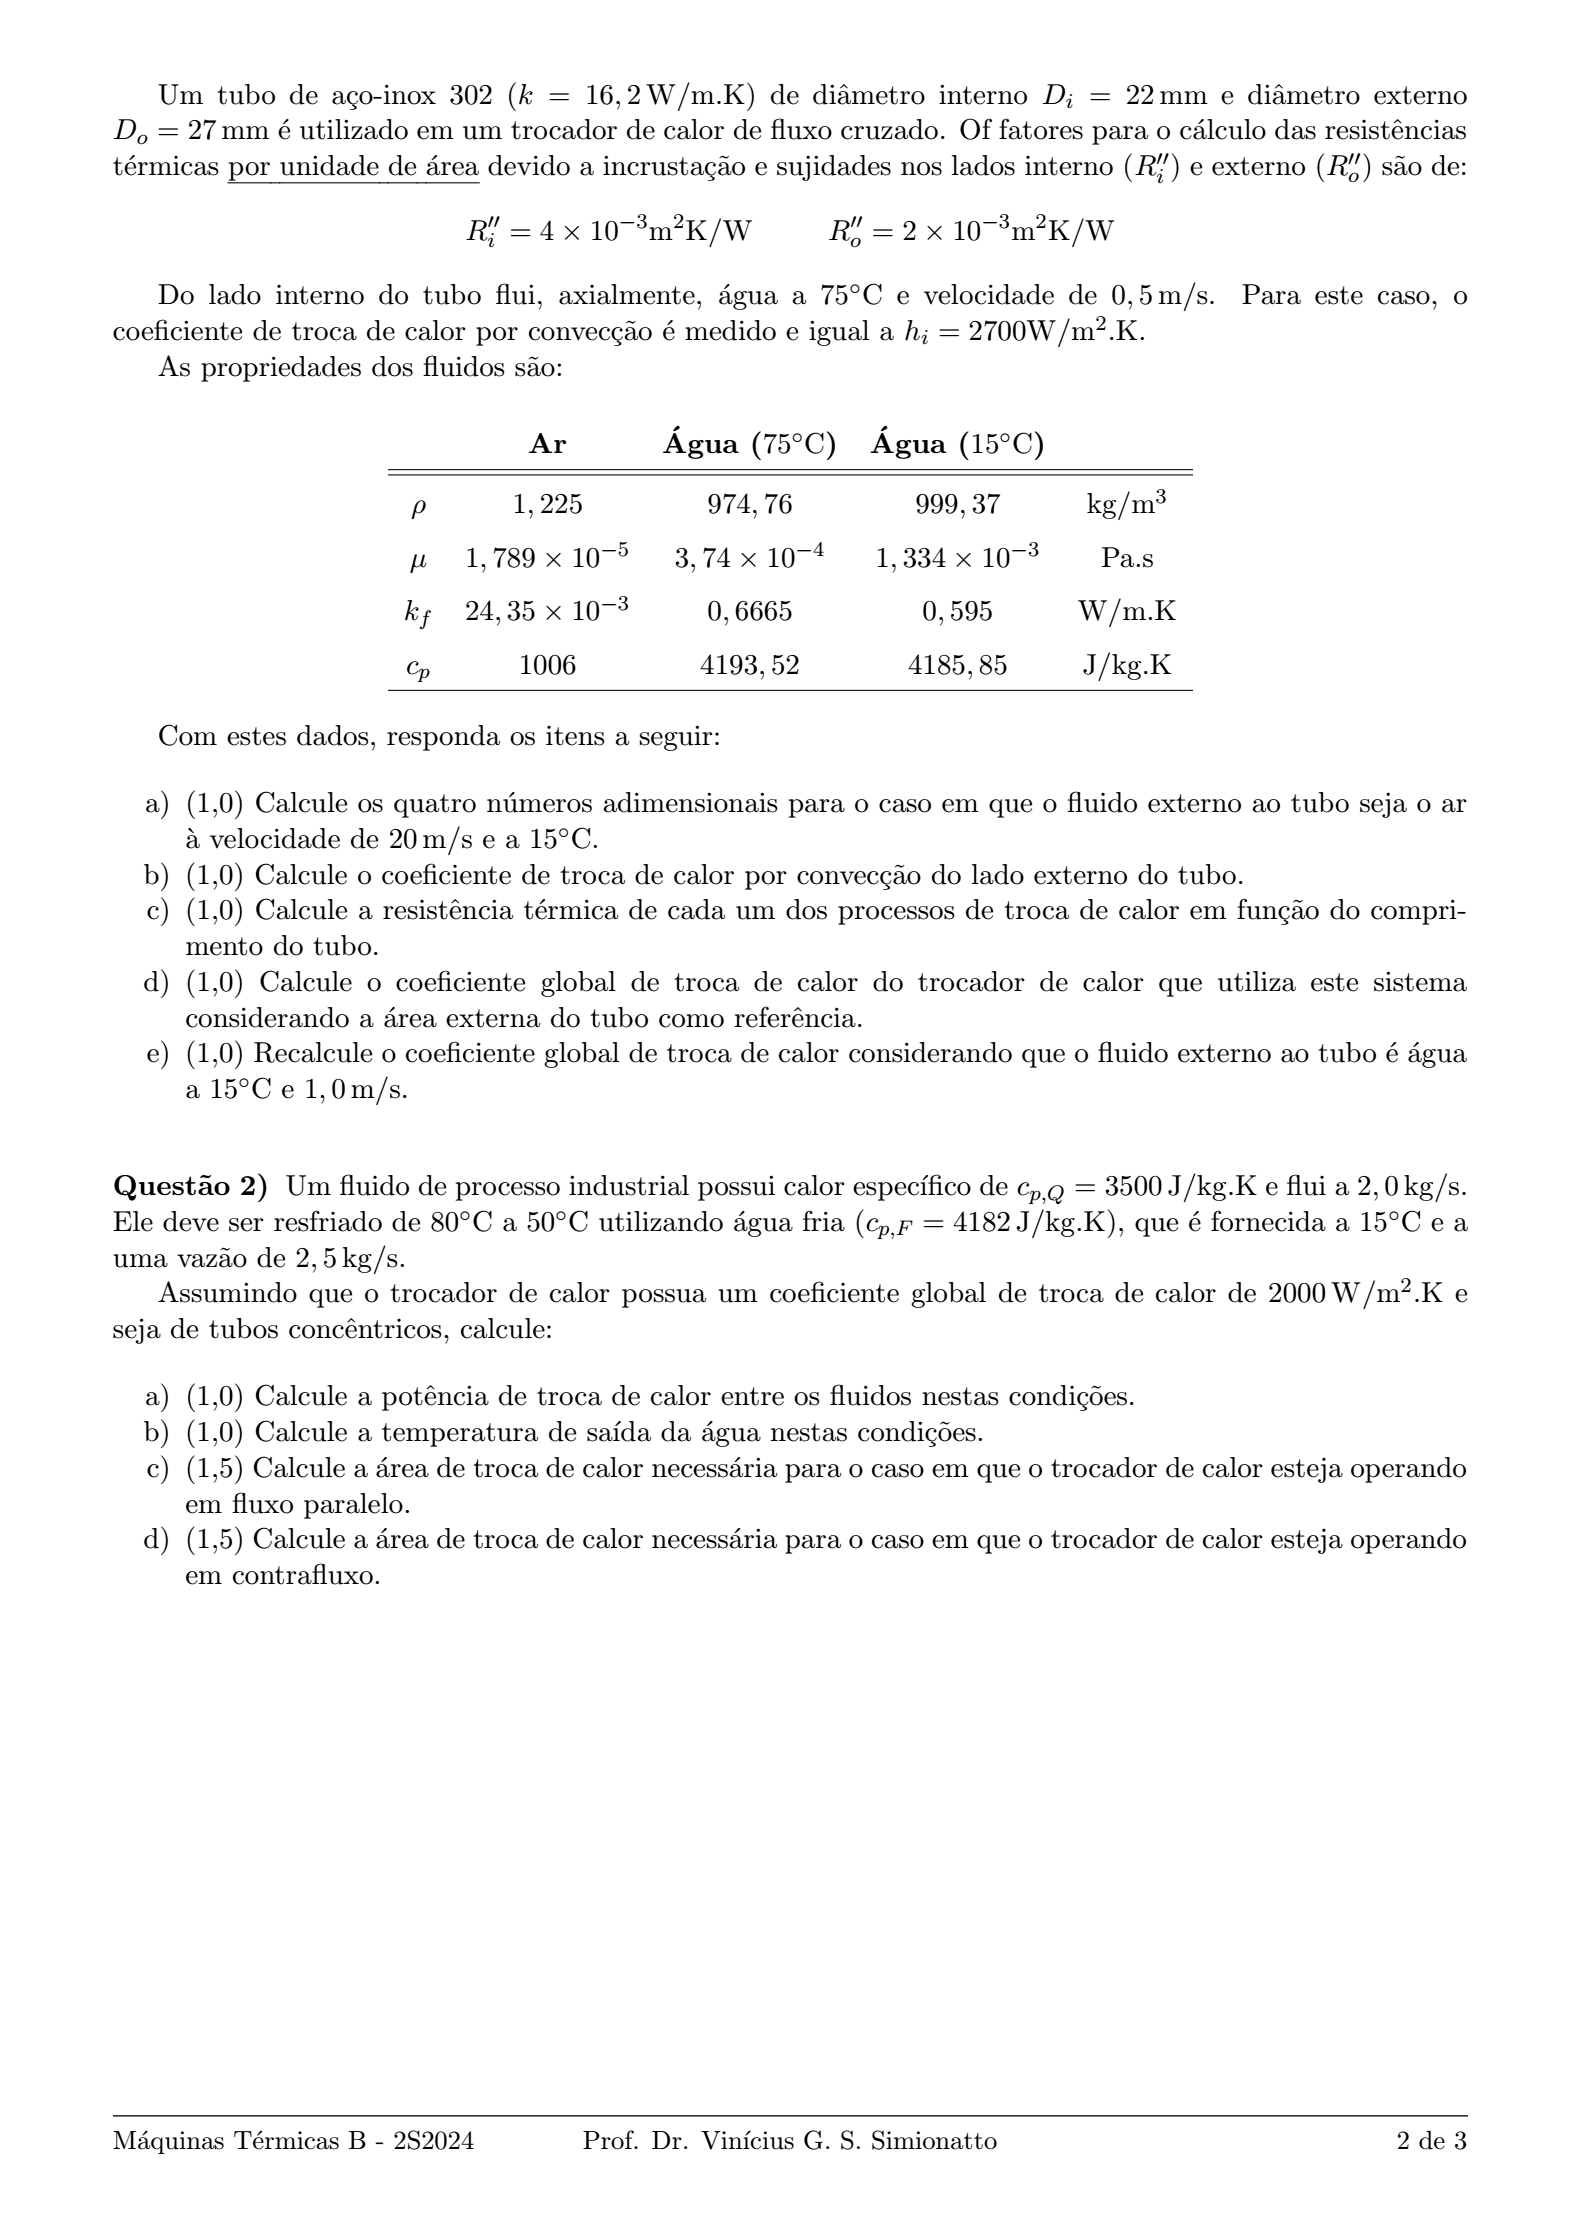

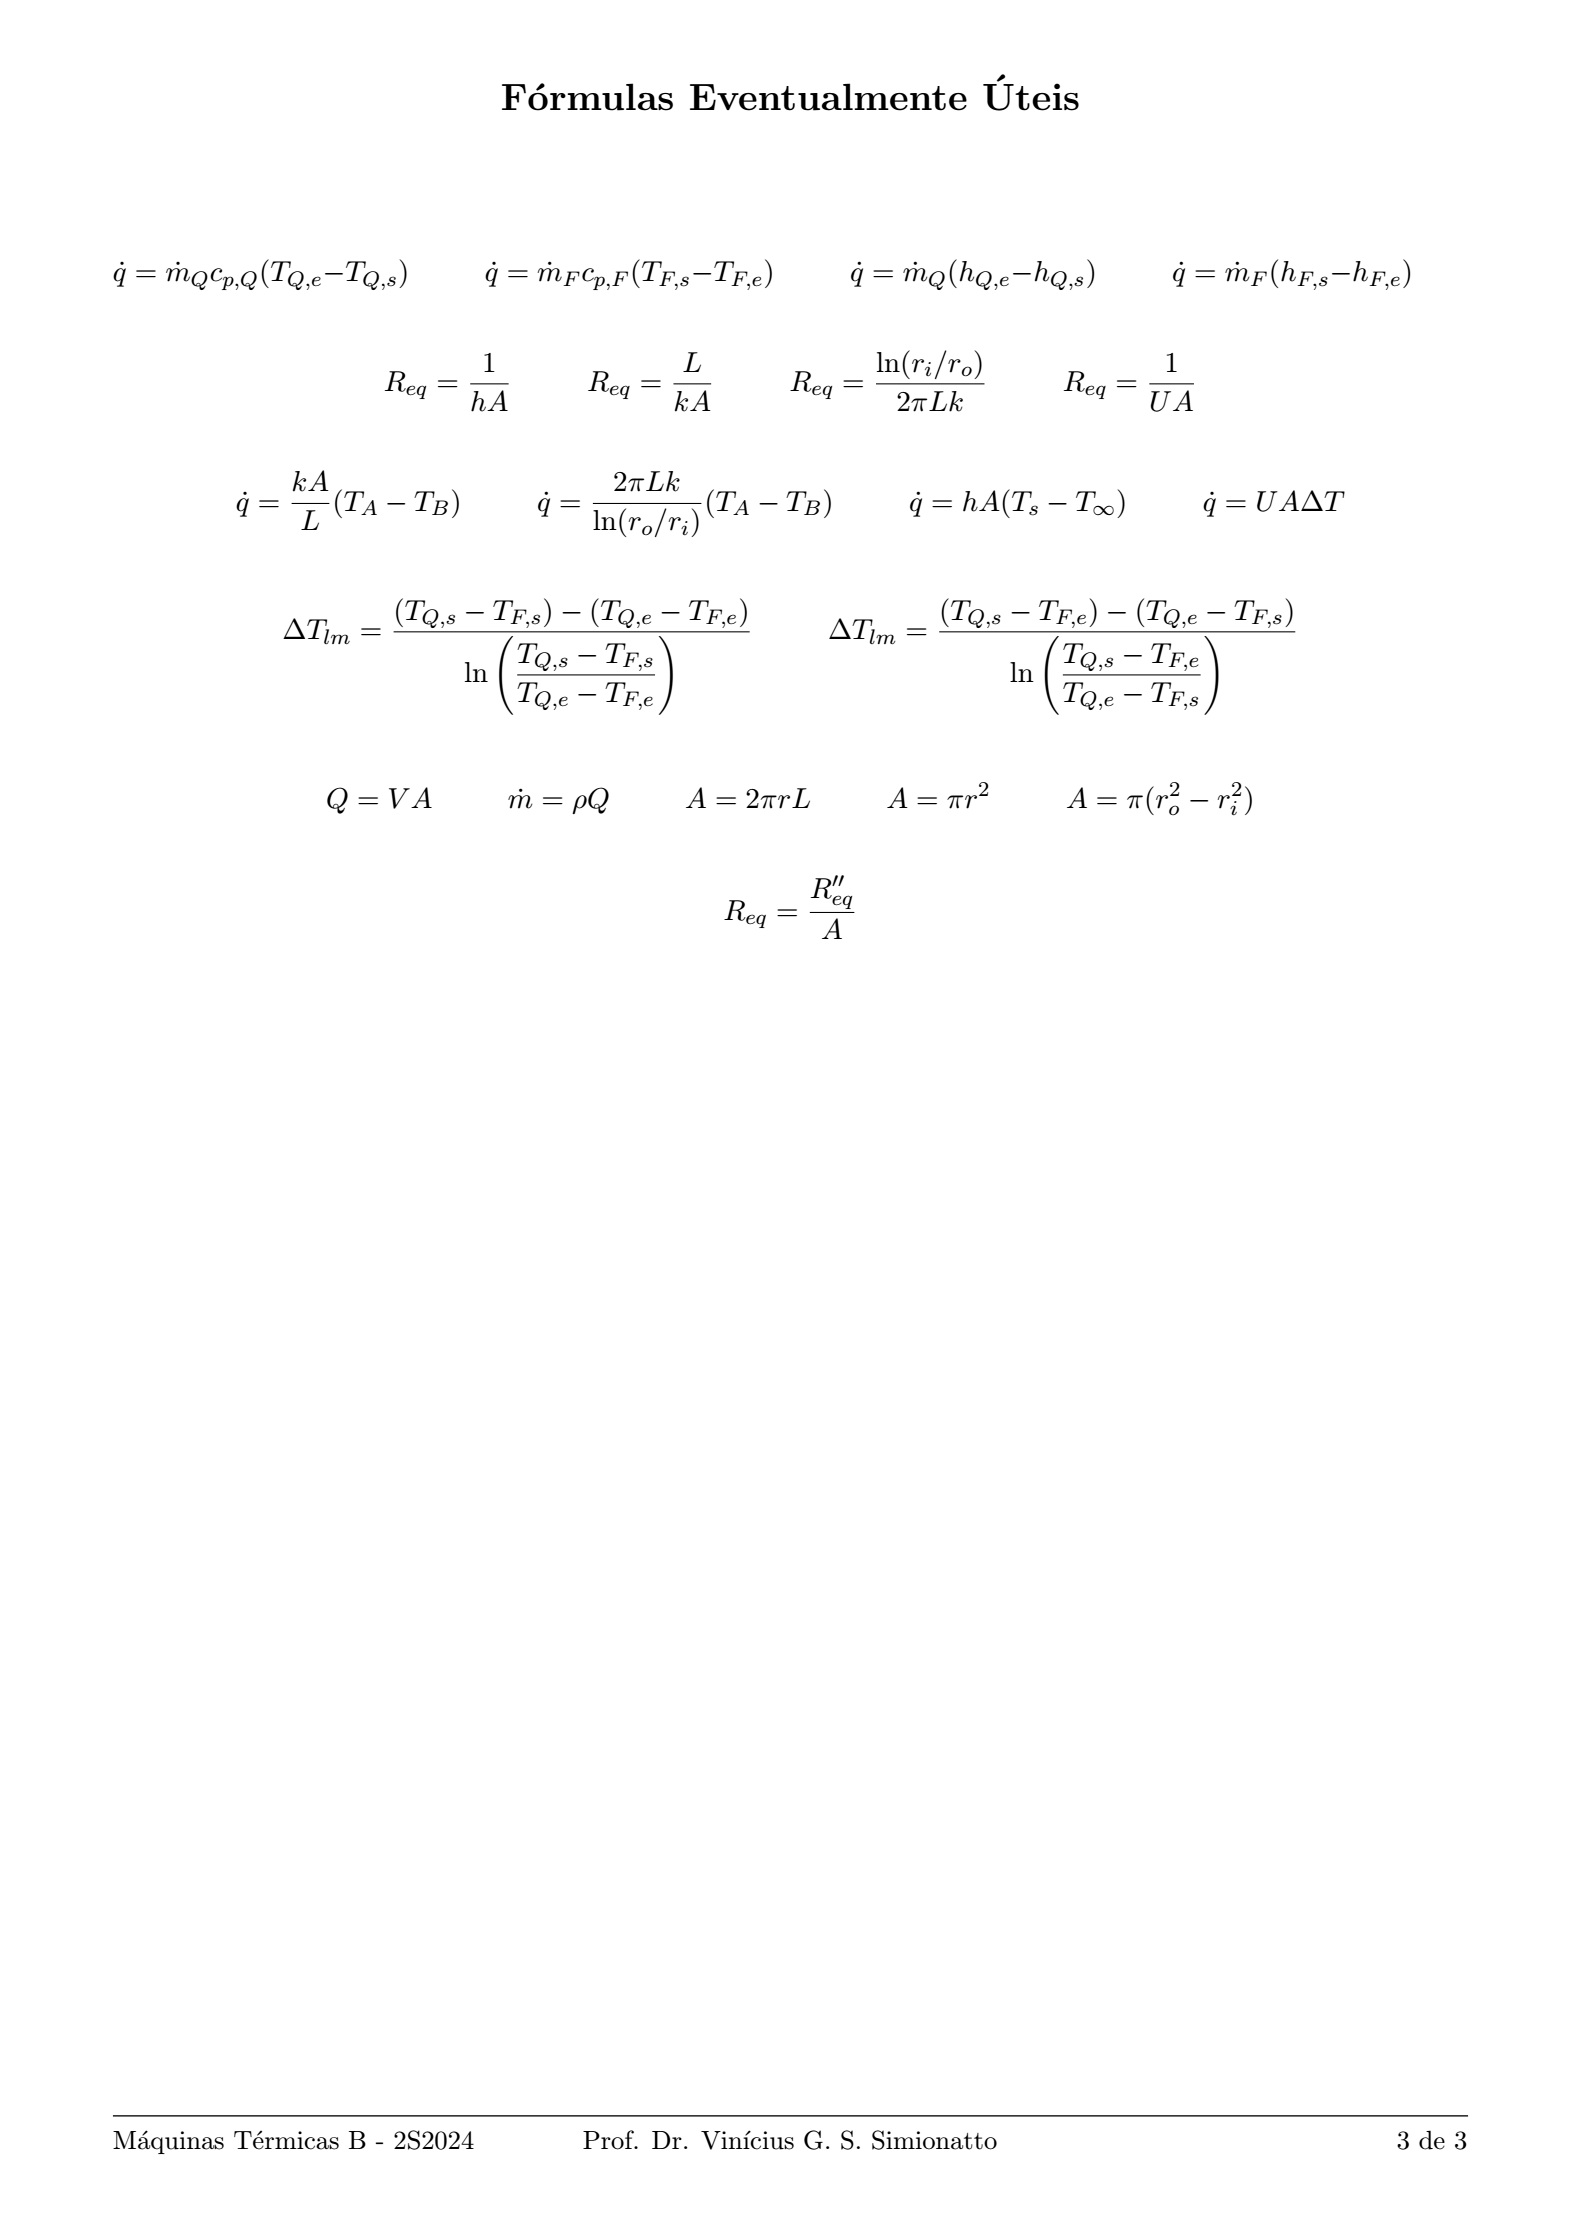

## Solução

### Questão 1 a)

Neste caso bastava calcular os números adimensionais conforme os dados e fórmulas fornecidas na avaliação.

In [ ]:
# Q1.a)

Ar = dict()

Ar['rho'] = 1.225     # kg/m^3
Ar['u']   = 1.789e-5  # Pa.s
Ar['k']   = 24.35e-3  # W/m.K
Ar['cp']  = 1006      # J/kg.K

V_ar = 20   # m/s

Do = 0.027  # m

Re_ar = Ar['rho']*V_ar*Do/Ar['u']
Pr_ar = Ar['u']*Ar['cp']/Ar['k']
Pe_ar = Re_ar*Pr_ar

def nu_cilindro_ext_cruzado(Re, Pr):
  return (0.3 + ((0.62*(Re**(1/2))*(Pr**(1/3)))/((1+(0.4/Pr)**(2/3))**(1/4))) *
  ((1+(Re/282000)**(5/8))**(4/5)))

Nu_ar = nu_cilindro_ext_cruzado(Re_ar, Pr_ar)

print(f'Re = {Re_ar:.2f}')
print(f'Pr = {Pr_ar:.2f}')
print(f'Pe = {Pe_ar:.2f}')
print(f'Nu = {Nu_ar:.2f}')

Re = 36975.96
Pr = 0.74
Pe = 27329.32
Nu = 115.99


### Questão 1 b)

Neste caso bastava isolar o $h$ da fórmula:

$$
\mathrm{Nu} = \frac{hD}{k}
$$

In [ ]:
# Q1.b)

h_ar = Nu_ar*Ar['k']/Do

print(f'h_ar = {h_ar:.2f} W/m²K')

h_ar = 104.61 W/m²K


### Questão 1.c)

Convecção interna:
$$
R_1 = \frac{1}{h_iA_i} = \frac{1}{h_i \pi D_i L}
$$

Incrustação Interna:
$$
R_2 = \frac{R_i''}{A_i} = \frac{R_i''}{\pi D_i L}
$$

Condução Radial:
$$
R_3 = \frac{\ln(r_o/r_i)}{2\pi L k}
$$

Incrustação Externa:
$$
R_4 = \frac{R_o''}{A_o} = \frac{R_o''}{\pi D_o L}
$$

Convecção Externa:
$$
R_5 = \frac{1}{h_oA_o} = \frac{1}{h_o \pi D_o L}
$$


In [ ]:
# Q1.c)

from numpy import pi
from numpy import log as ln

hi = 2700     # W/m²K (fornecido)
Di = 0.022    # m
Ridd = 0.004  # m²K/W
Rodd = 0.002  # m²K/W
k_ss = 16.2   # W/m.K (k do aço inox)

R1_L = 1/(hi*pi*Di)
R2_L = Ridd/(pi*Di)
R3_L = ln((Do/Di))/(2*pi*k_ss)
R4_L = Rodd/(pi*Do)
R5_L = 1/(h_ar*pi*Do)

print(f'R1*L = {R1_L:.6f} m.K/W')
print(f'R2*L = {R2_L:.6f} m.K/W')
print(f'R3*L = {R3_L:.6f} m.K/W')
print(f'R4*L = {R4_L:.6f} m.K/W')
print(f'R5*L = {R5_L:.6f} m.K/W')

R1*L = 0.005359 m.K/W
R2*L = 0.057875 m.K/W
R3*L = 0.002012 m.K/W
R4*L = 0.023579 m.K/W
R5*L = 0.112700 m.K/W


### Questão 1.d)

Neste caso, para uma "fatia" do trocador de comprimento $L$, a resistência equivalente seria da forma:

$$
\frac{1}{U_o A_o} = R_1 + R_2 + R_3 + R_4 + R_5
$$

Assim:

$$
\frac{1}{U_o \pi D_o L} = \frac{1}{h_i \pi D_i L} + \frac{R_i''}{\pi D_i L} + \frac{\ln(r_o/r_i)}{2\pi L k} + \frac{R_o''}{\pi D_o L} + \frac{1}{h_o \pi D_o L}
$$

A partir desta fórmula é possível multiplicar ambos os lados por $L$, eliminando esta variável, e calcular o $U_o$ como segue:

$$
U_o = \left(\frac{D_o}{h_i D_i} + \frac{D_o R_i''}{D_i} + \frac{D_o \ln(r_o/r_i)}{2k} + R_o'' + \frac{1}{h_o}\right)^{-1}
$$

In [ ]:
# Q1.d)

Uo = 1/((R1_L + R2_L + R3_L + R4_L + R5_L)*pi*Do)

print(f'Uo = {Uo:.2f} W/m²K')

Uo = 58.50 W/m²K


### Questão 1 e)

Basta repetir todo o procedimento com os dados da água a 15°C:

In [ ]:
# Q1.e)

Agua15 = dict()

Agua15['rho'] = 999.37    # kg/m³
Agua15['u']   = 1.334e-3  # Pa.s
Agua15['k']   = 0.595     # W/m.K
Agua15['cp']  = 4185.85   # J/kg.K

V_ag = 1  # m/s

Re_ag = Agua15['rho']*V_ag*Do/Agua15['u']
Pr_ag = Agua15['u']*Agua15['cp']/Agua15['k']
Nu_ag = nu_cilindro_ext_cruzado(Re_ag, Pr_ag)
Pe_ag = Re_ag*Pr_ag

print(f'Re = {Re_ag:.2f}')
print(f'Pr = {Pr_ag:.2f}')
print(f'Pe = {Pe_ag:.2f}')
print(f'Nu = {Nu_ag:.2f}')

h_ag = Nu_ag*Agua15['k']/Do

R5_L = 1/(h_ag*pi*Do)

Uo = 1/((R1_L + R2_L + R3_L + R4_L + R5_L)*pi*Do)

print(f'h_ag = {h_ag:.2f} W/m²K')
print(f'Uo = {Uo:.2f} W/m²K')

Re = 20227.13
Pr = 9.38
Pe = 189826.47
Nu = 208.37
h_ag = 4591.91 W/m²K
Uo = 129.00 W/m²K


### Questão 2 a)

Do lado quente já se possui todos os dados necessários para calcular $\dot{q}$:

In [ ]:
# Q2.a)

%reset -f

dm_q = 2     # kg/s
cp_q = 3500  # J/kg.K
T_qe = 80    # °C
T_qs = 50    # °C

dm_f = 2.5   # kg/s
cp_f = 4182  # J/kg.K
T_fe = 15    # °C

U = 2000     # W/m²K

dq = dm_q*cp_q*(T_qe-T_qs)

print(f'dq = {dq:.2f} W')

dq = 210000.00 W


### Questão 2 b)

Com o valor de $\dot{q}$ calculado, é possível calcular a temperatura de saída do fluido frio:

In [ ]:
# Q2.b)

T_fs = dq/(dm_f*cp_f) + T_fe

print(f'T_fs = {T_fs:.2f} °C')

T_fs = 35.09 °C


### Questão 2 c)

Como $\dot{q}$ e $U$ são conhecidos, bem como as 4 temperaturas do trocador de calor, basta isolar a área de:

$$
\dot{q} = UA\Delta T_{lm}
$$

Lembrando que para o caso de fluxo paralelo:
$$
\Delta T_{lm} = \frac{(T_{qs}-T_{fs})-(T_{qe}-T_{fe})}{\ln\left(\displaystyle \frac{T_{qs}-T_{fs}}{T_{qe}-T_{fe}}\right)}
$$

In [ ]:
# Q2.c)

from numpy import log as ln

def dtlm_paralelo(T_qe, T_qs, T_fe, T_fs):
  return ((T_qs-T_fs) - (T_qe-T_fe))/ln((T_qs-T_fs)/(T_qe-T_fe))

Ap = dq/(U*dtlm_paralelo(T_qe, T_qs, T_fe, T_fs))

print(f'Área (fluxo paralelo) = {Ap:.2f} m²')

Área (fluxo paralelo) = 3.09 m²


### Questão 2 d)

É a mesma resolução do caso anterior, lembrando que para o caso de contrafluxo:

$$
\Delta T_{lm} = \frac{(T_{qs}-T_{fe})-(T_{qe}-T_{fs})}{\ln\left(\displaystyle \frac{T_{qs}-T_{fe}}{T_{qe}-T_{fs}}\right)}
$$

In [ ]:
# Q2.d)

def dtlm_contrafluxo(T_qe, T_qs, T_fe, T_fs):
  return ((T_qs-T_fe) - (T_qe-T_fs))/ln((T_qs-T_fe)/(T_qe-T_fs))

Ac = dq/(U*dtlm_contrafluxo(T_qe, T_qs, T_fe, T_fs))

print(f'Área (contrafluxo) = {Ac:.2f} m²')

Área (contrafluxo) = 2.64 m²
